In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/gunz/Downloads/spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df.columns.values

array(['Unnamed: 0', 'label', 'text', 'label_num'], dtype=object)

In [5]:
df.corr()

,Unnamed: 0,label_num
Unnamed: 0,1.000000,0.785847
label_num,0.785847,1.000000


In [6]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('-----------------------*********---------------------------')

Unnamed: 0
2047    1
537     1
4663    1
2616    1
569     1
       ..
1190    1
3239    1
1194    1
3243    1
0       1
Name: Unnamed: 0, Length: 5171, dtype: int64
-----------------------*********---------------------------
label
ham     3672
spam    1499
Name: label, dtype: int64
-----------------------*********---------------------------
text
Subject: calpine daily gas nomination\r\n>\r\nricky a . archer\r\nfuel supply\r\n700 louisiana , suite 2700\r\nhouston , texas 77002\r\n713 - 830 - 8659 direct\r\n713 - 830 - 8722 fax\r\n- calpine daily gas nomination 1 . doc                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [7]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

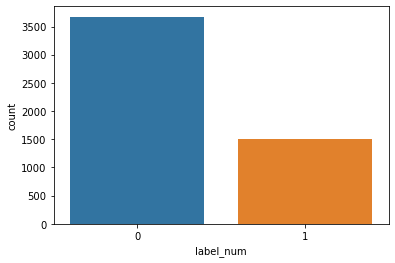

In [9]:
sns.countplot(df['label_num'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vector = CountVectorizer()
spam_ham = vector.fit_transform(df['text'])
spam_ham.toarray

<bound method _cs_matrix.toarray of <5171x50447 sparse matrix of type '<class 'numpy.int64'>'
	with 456145 stored elements in Compressed Sparse Row format>>

In [12]:
x =spam_ham
y= df['label_num'].values
y

array([0, 0, 0, ..., 0, 0, 1])

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)


MultinomialNB()

In [15]:
ypred = nb.predict(xtrain)
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [16]:
ypredtest = nb.predict(xtest)
ypredtest

array([0, 1, 0, ..., 1, 0, 0])

In [17]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
cmtest = confusion_matrix( ytest, ypredtest)
cmtrain = confusion_matrix (ytrain, ypred)
cmtest

array([[731,  11],
       [ 11, 282]])

In [18]:
cmtrain

array([[2909,   21],
       [  33, 1173]])

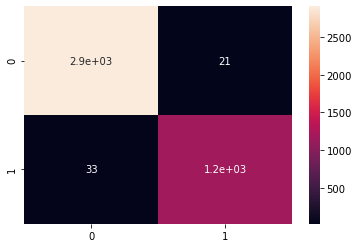

In [19]:
sns.heatmap(cmtrain, annot=True)


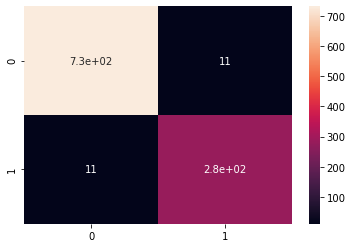

In [20]:
sns.heatmap(cmtest, annot=True)

In [21]:

accuracy_score(ytest, ypredtest)

0.978743961352657

In [22]:
classification_report(ypredtest,ytest)


'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       742\n           1       0.96      0.96      0.96       293\n\n    accuracy                           0.98      1035\n   macro avg       0.97      0.97      0.97      1035\nweighted avg       0.98      0.98      0.98      1035\n'